## Import Packages

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, mean_absolute_error
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Data Reading

In [17]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [19]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [20]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [21]:
df.shape

(50000, 14)

## Data Cleaning

In [22]:
label_encoder = LabelEncoder()
columns_to_encode = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
#Other way to train the machine with object data type
#df = pd.get_dummies(df, columns=['categorical_column'])

# ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
# df['ordinal_column'] = df['ordinal_column'].map(ordinal_mapping)

# from gensim.models import Word2Vec
# model = Word2Vec(sentences=df['text_column'], vector_size=100, window=5, min_count=1, workers=4)

## Model Training

In [42]:
X = df.iloc[:,:13]
Y = df.iloc[:,13]

In [43]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size= 0.20, random_state= 70)

In [62]:
clf = RandomForestClassifier(max_depth= 13, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=13, random_state=0)

In [63]:
y_pred = clf.predict(x_test)

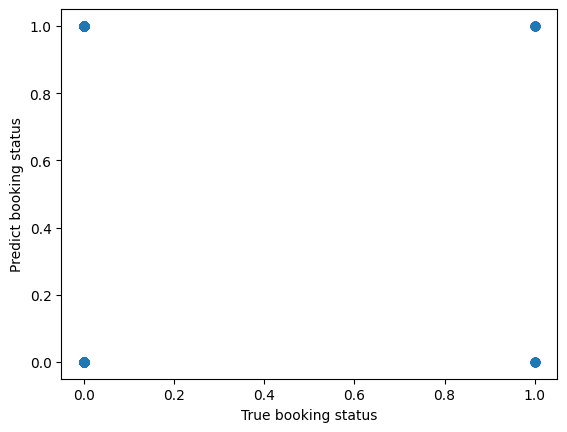

In [64]:
plt.scatter(y_pred, y_test)
plt.xlabel('True booking status')
plt.ylabel('Predict booking status')
plt.show()

In [66]:
feat_important = clf.feature_importances_

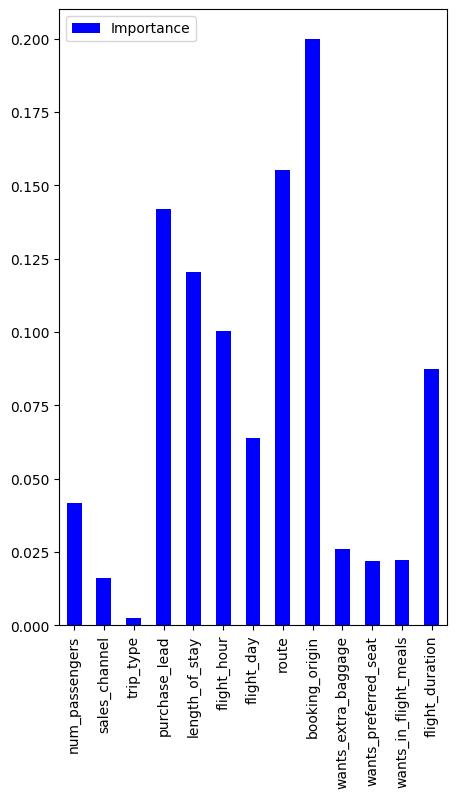

In [67]:
feat_important = pd.DataFrame(clf.feature_importances_, index= X.columns, columns=['Importance'])
feat_important.sort_values(by='Importance', ascending= False)
feat_important.plot(kind='bar', figsize=(5,8), color='blue')
plt.show()

## Rate the Model

In [58]:
clf.score(X_train, Y_train)

0.873675

In [68]:
clf.score(x_test, y_test)

0.8472

In [69]:
accuracy_score(y_test, y_pred)

0.8472

In [70]:
confusion_matrix(y_test, y_pred)

array([[8435,   26],
       [1502,   37]], dtype=int64)

In [72]:
TN = 37
TP = 8435
FP = 26
FN = 1502

precision = TP/(TP+FN)
recall = TP/(TP+FN)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.848847740766831
Recall: 0.848847740766831


In [73]:
print(f'f1 score: {2*precision*recall/(precision+recall)}')

f1 score: 0.848847740766831


In [75]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
fpr, tpr

(array([0.        , 0.00307292, 1.        ]),
 array([0.        , 0.02404159, 1.        ]))

In [76]:
print(f'Area under curve: {auc(fpr, tpr)}')

Area under curve: 0.5104843313113664


In [77]:
train_err = []
test_err = []
for depth in  range(1, 14):
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    y_pred = clf.predict(x_test)
    train_err.append(mean_absolute_error(Y_train, Y_pred))
    test_err.append(mean_absolute_error(y_test, y_pred))

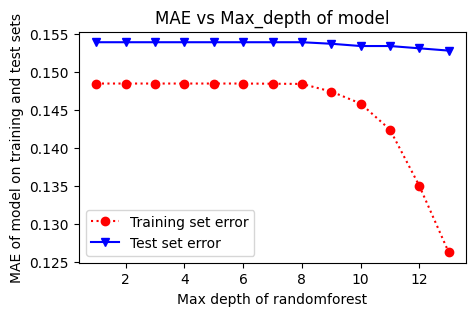

In [81]:
x = np.linspace(1,13,13)

fig, ax = plt.subplots(figsize = (5,3))
ax.plot(x, train_err, 'o:r', label='Training set error')
ax.plot(x, test_err, 'v-b', label='Test set error')
ax.set_xlabel('Max depth of randomforest')
ax.set_ylabel('MAE of model on training and test sets')
ax.set_title('MAE vs Max_depth of model')
ax.legend()
plt.show()